In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#veriyi yüklüyoruz
df=pd.read_csv('suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#kullanıcı ıd'si gereksiz bir bilgi olduğu için kaldırıyoruz
df.drop(['User ID'], axis=1, inplace = True)

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

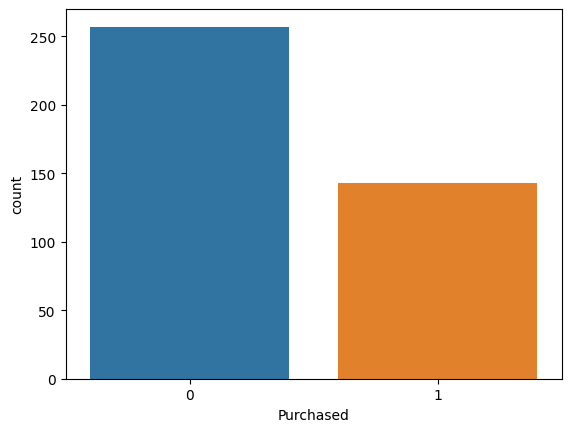

In [ ]:
sns.countplot(x = 'Purchased',data=df)

In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

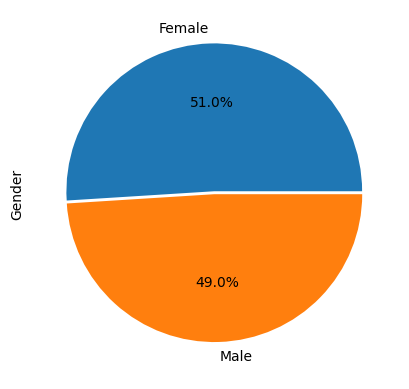

In [ ]:
df['Gender'].value_counts().plot.pie(explode=[0.02, 0], autopct='%.1f%%')
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

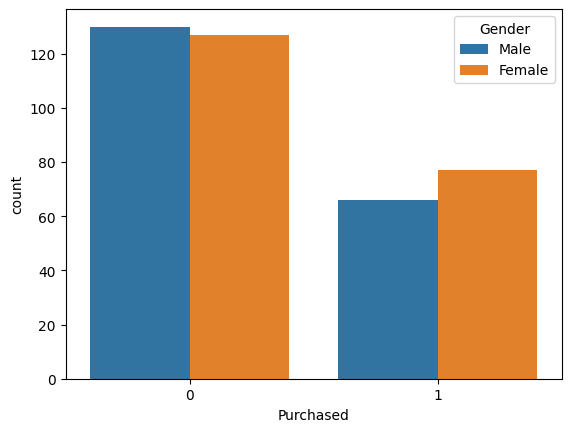

In [ ]:
sns.countplot( x='Purchased', hue='Gender', data=df)

In [ ]:
print("En büyük yaş değeri: ", df["Age"].max())
print("En küçük yaş değeri: ", df["Age"].min())

En büyük yaş değeri:  60
En küçük yaş değeri:  18


<Axes: >

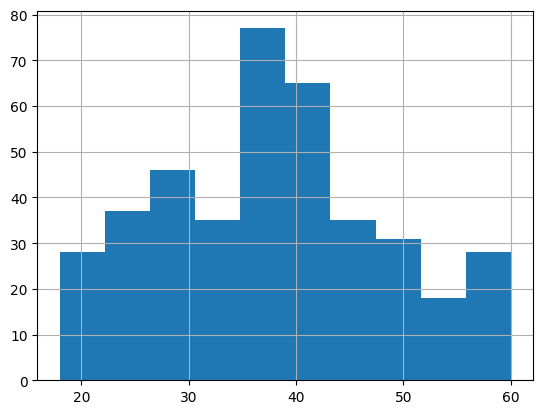

In [ ]:
df['Age'].hist(bins = 10)

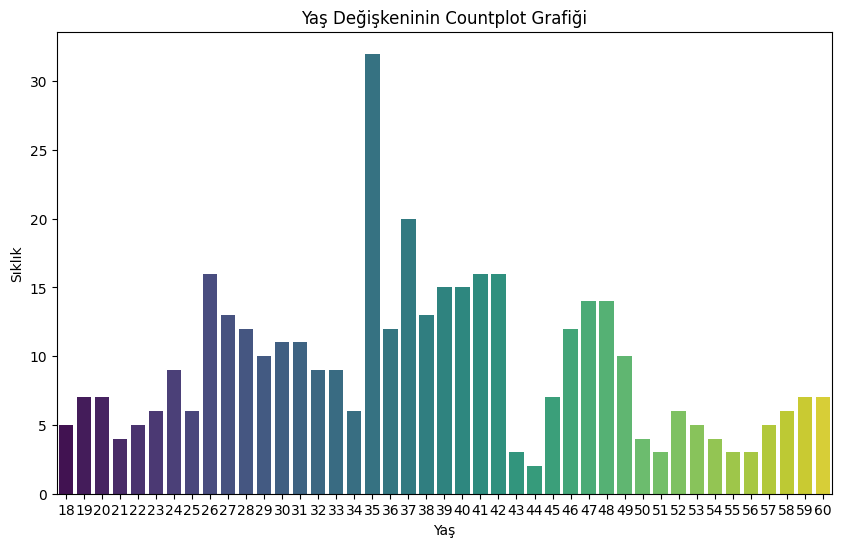

In [ ]:
# 'Age' sütununun countplot grafiğini çizme
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Yaş Değişkeninin Countplot Grafiği')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.show()

In [ ]:
print("en yüksek maaş değeri: ", df["EstimatedSalary"].max())
print("en düşük maaş değeri: ", df["EstimatedSalary"].min())

en yüksek maaş değeri:  150000
en düşük maaş değeri:  15000


<Axes: >

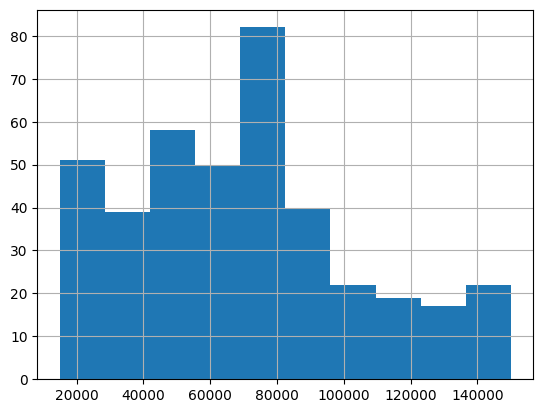

In [ ]:
df['EstimatedSalary'].hist(bins = 10)

In [ ]:
df2 = df.copy()
bins = [15000, 60000, 105000, 150000]
labels =["15000-60000", "60000-105000", "105000-150000"]
df2['SalaryCategory'] = pd.cut(df2['EstimatedSalary'], bins, labels=labels)
df2.head()

,Gender,Age,EstimatedSalary,Purchased,SalaryCategory
0,Male,19,19000,0,15000-60000
1,Male,35,20000,0,15000-60000
2,Female,26,43000,0,15000-60000
3,Female,27,57000,0,15000-60000
4,Male,19,76000,0,60000-105000


<Axes: xlabel='Purchased', ylabel='count'>

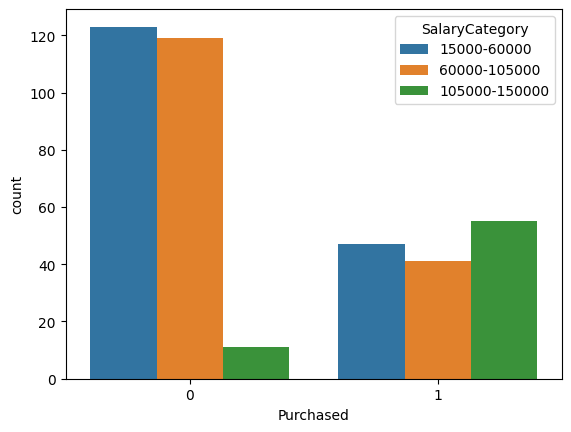

In [ ]:
sns.countplot ( x = 'Purchased', hue = 'SalaryCategory', data = df2)

In [ ]:
#kategorik verileri sayısal değerlere dönüştürmek için LabelEncoder sınıfını kullanıyoruz
le = LabelEncoder()

In [ ]:
#Gender sütunundaki her bir kategorik değeri,fit_transform metodunu kullanarak sayısal bir değere dönüştürüyoruz
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
#veri setinden "Purchased" sütununu çıkarıyoruz
#böylelikle X veri seti 'Purchased'sütununu içermeyen bağımsız değişkenlerden oluşuyor
X = df.drop(['Purchased'], axis=1)
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
#veri setinden 'Purchased' sütununu seçerek Y veri setini oluşturuyoruz.
#böylelikle Y veri seti sadece 'Purchased' sütununu içeren bağımlı değişkenlerden oluşuyor
Y = df['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
#verilerimizi eğitim ve test verilerine bölüyoruz
#train_test_split fonksiyonu, X ve Y'yi test_size parametresi ile belirlenen oranda eğitim ve test alt kümelerine bölüyor
#bölme işleminin rastgele olmasını sağlamak için random_state parametresini kullanıyoruz
#bu sayede aynı veri seti üzerinde yapılan bölme işleminin tekrarlanabilir olması sağlanıyor
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state=99)

In [ ]:
#eğitim ve test alt kümelerinin boyutlarını görüntülemek için shape fonksiyonunu kullanıyoruz
#her bir alt kümenin kaç örnek (gözlem) ve özellik (sütun) içerdiğini görüyoruz
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((280, 3), (120, 3), (280,), (120,))

In [ ]:
# model adlı değişkeni oluşturulan DecisionTreeClassifier'a atıyoruz
#böylelikle model değişkeni bir karar ağacı sınıflandırıcısı oluyor
model = DecisionTreeClassifier()

In [ ]:
#karar ağacı modelini eğitiyoruz
#fit metodu,modelin eğitim verilerine(train_x ve train_y) uyum sağlamasını sağlıyor
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
#'features' eğitim verilerinin özelliklerini temsil eder
#'importance' eğitilen karar ağacı modelindeki her bir özelliğin ne kadar önemli olduğunu belirler
#sort_values metodu ile en önemli özellikler en üstte olacak şekilde sıralama yapılır
features = pd.DataFrame({'Features' : train_x.columns, 'Importance' : model.feature_importances_})
features.sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.536110
2,EstimatedSalary,0.445034
0,Gender,0.018857


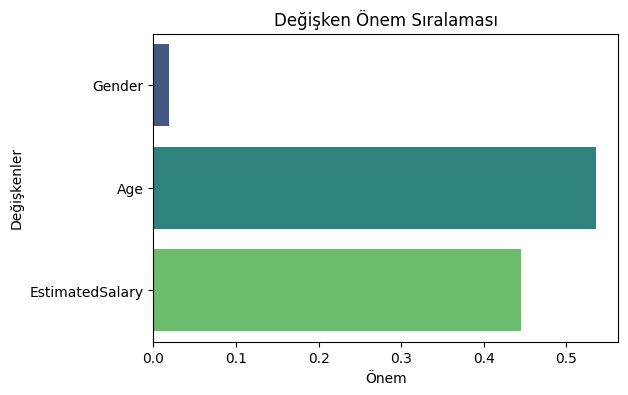

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Features', data=features, palette='viridis')
plt.title('Değişken Önem Sıralaması')
plt.xlabel('Önem')
plt.ylabel('Değişkenler')
plt.show()

In [ ]:
#eğitilmiş karar ağacı modelini kullanarak,test veri seti(test_x) üzerinde tahmin yapıyoruz
#y_pred:test veri seti üzerinde yapılan tahminleri içerir.
y_pred  = model.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
#test ettiğimiz verilerin doğruluk değerini hesaplıyoruz
model.score(test_x, test_y)

0.875

In [ ]:
#Gerçek değerler ile modelin yaptığı tahmini değerleri içeren bir Pandas DataFrame oluşturarak ikisini karşılaştırıyoruz
sonuc = pd.DataFrame({'Gercek' : test_y, 'Tahmin' : y_pred})
sonuc

,Gercek,Tahmin
61,0,0
348,0,0
163,0,0
7,1,1
275,1,1
...,...,...
259,1,0
241,0,0
106,0,0
200,0,0


In [ ]:
#modelin doğruluğunu hesaplıyoruz
accuracy_score(test_y, y_pred)*100

87.5

In [ ]:
cm = confusion_matrix(test_y , y_pred)

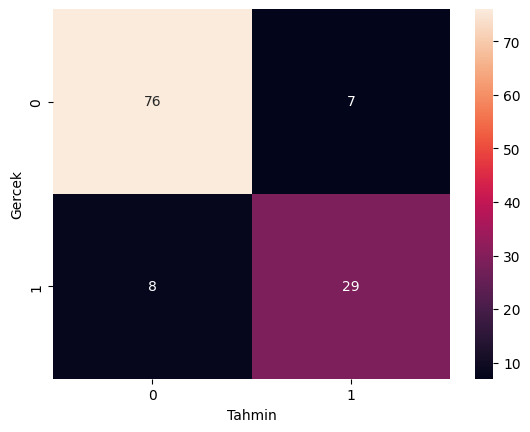

In [ ]:
#Heatmap ile confusion matrix'i çiziyoruz
#annot=True:ısı haritasındaki her hücrenin değerlerinin görüntülenmesini sağlar
#böylelikle her hücrede kaç doğru/yanlış sınıflandırma olduğunu görebiliriz
#fmt="d":sayıları tam sayı olarak biçimlendirir
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Tahmin')
plt.ylabel('Gercek')
plt.show()

In [ ]:
#Kişinin suv araç satın alıp almayacağını tahmin etmek için yeni verileri giriyoruz
new_data = pd.DataFrame({'Gender': [0],
                         'Age': [40],
                         'EstimatedSalary': [90000]})

#Tahmin yapıyoruz
prediction = model.predict(new_data)

#Tahmin sonucunu yazdırıyoruz
print("Tahmin Edilen Purchased Değeri:", prediction[0])

Tahmin Edilen Purchased Değeri: 1
